In [2]:
import numpy as np
import pandas as pd 
import warnings
import time 
warnings.filterwarnings('ignore')

import tensorflow
from tensorflow.python.keras import backend as K 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import Adam

import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report
from sklearn.utils import class_weight

Using TensorFlow backend.


In [3]:
from pycaret.classification import *

In [4]:
from skopt import gbrt_minimize, gp_minimize
from skopt.utils import use_named_args
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective
from skopt import dump, load

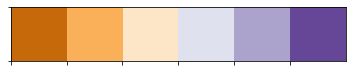

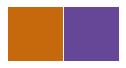

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("PuOr"))
pal = sns.color_palette('PuOr', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#c6690c", "#664697"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [6]:
insurance_dataset = r'C:\Users\c819934\SILAS\full_stack_machine_learning\deep-learning-customer-classification\data\Data_Insurance_TGI.csv'

df = pd.read_csv(insurance_dataset)
df.head()

,Customer_ID,Gender,Referrer,State,PaidFullPremiumBefore,BecameCust,DurationAsCust,Accident/Health_(P)_Duration,Accident/Health_(P)_Amount,Builders_Risk_(P)_Duration,...,Life_(P)_Amount,Motorcycle_Duration,Motorcycle_Amount,Private_Passenger_Auto_Duration,Private_Passenger_Auto_Amount,Umbrella_(P)_Duration,Umbrella_(P)_Amount,Total_Duration,Total_Amount,StillCustomer
0,786258,M,None,TX,1,1,48,0,0.0,0,...,0.0,0,0,12,6087.15,0,0,60,11011.15,1
1,786063,M,None,TX,1,1,59,0,0.0,0,...,0.0,0,0,0,0.00,0,0,48,4803.00,1
2,786101,M,None,TX,1,1,51,0,0.0,0,...,0.0,0,0,51,15282.00,0,0,75,17954.00,1
3,786217,M,None,TX,1,1,48,0,0.0,0,...,0.0,0,0,48,40597.26,0,0,95,54403.26,1
4,786642,F,None,TX,1,1,47,0,0.0,0,...,0.0,0,0,12,888.00,0,0,59,3003.00,1


In [7]:
df.shape

(713, 30)

In [8]:
df.describe().round(2)

,Customer_ID,PaidFullPremiumBefore,BecameCust,DurationAsCust,Accident/Health_(P)_Duration,Accident/Health_(P)_Amount,Builders_Risk_(P)_Duration,Builders_Risk_(P)_Amount,Dwelling_Fire_Duration,Dwelling_Fire_Amount,...,Life_(P)_Amount,Motorcycle_Duration,Motorcycle_Amount,Private_Passenger_Auto_Duration,Private_Passenger_Auto_Amount,Umbrella_(P)_Duration,Umbrella_(P)_Amount,Total_Duration,Total_Amount,StillCustomer
count,713.00,713.00,713.0,713.00,713.00,713.00,713.00,713.00,713.00,713.00,...,713.00,713.00,713.00,713.00,713.00,713.00,713.00,713.00,713.00,713.00
mean,786390.13,0.51,1.0,30.89,0.04,0.13,0.03,3.58,1.79,281.97,...,7.33,0.02,0.65,16.71,3829.24,0.32,12.09,37.21,6171.38,0.63
std,227.29,0.50,0.0,16.55,0.97,3.38,0.50,81.99,7.39,1463.43,...,132.45,0.45,17.45,18.21,5874.02,3.32,137.25,29.92,7654.71,0.48
min,786000.00,0.00,1.0,3.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,81.00,0.00
25%,786186.00,0.00,1.0,12.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,1385.00,0.00
50%,786383.00,1.00,1.0,30.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,12.00,1578.00,0.00,0.00,24.00,3290.00,1.00
75%,786592.00,1.00,1.0,48.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,30.00,5149.77,0.00,0.00,48.00,8006.91,1.00
max,786786.00,1.00,1.0,69.00,26.00,90.32,12.00,2153.00,56.00,18478.92,...,3295.00,12.00,466.00,66.00,45661.82,48.00,2490.00,163.00,60330.92,1.00


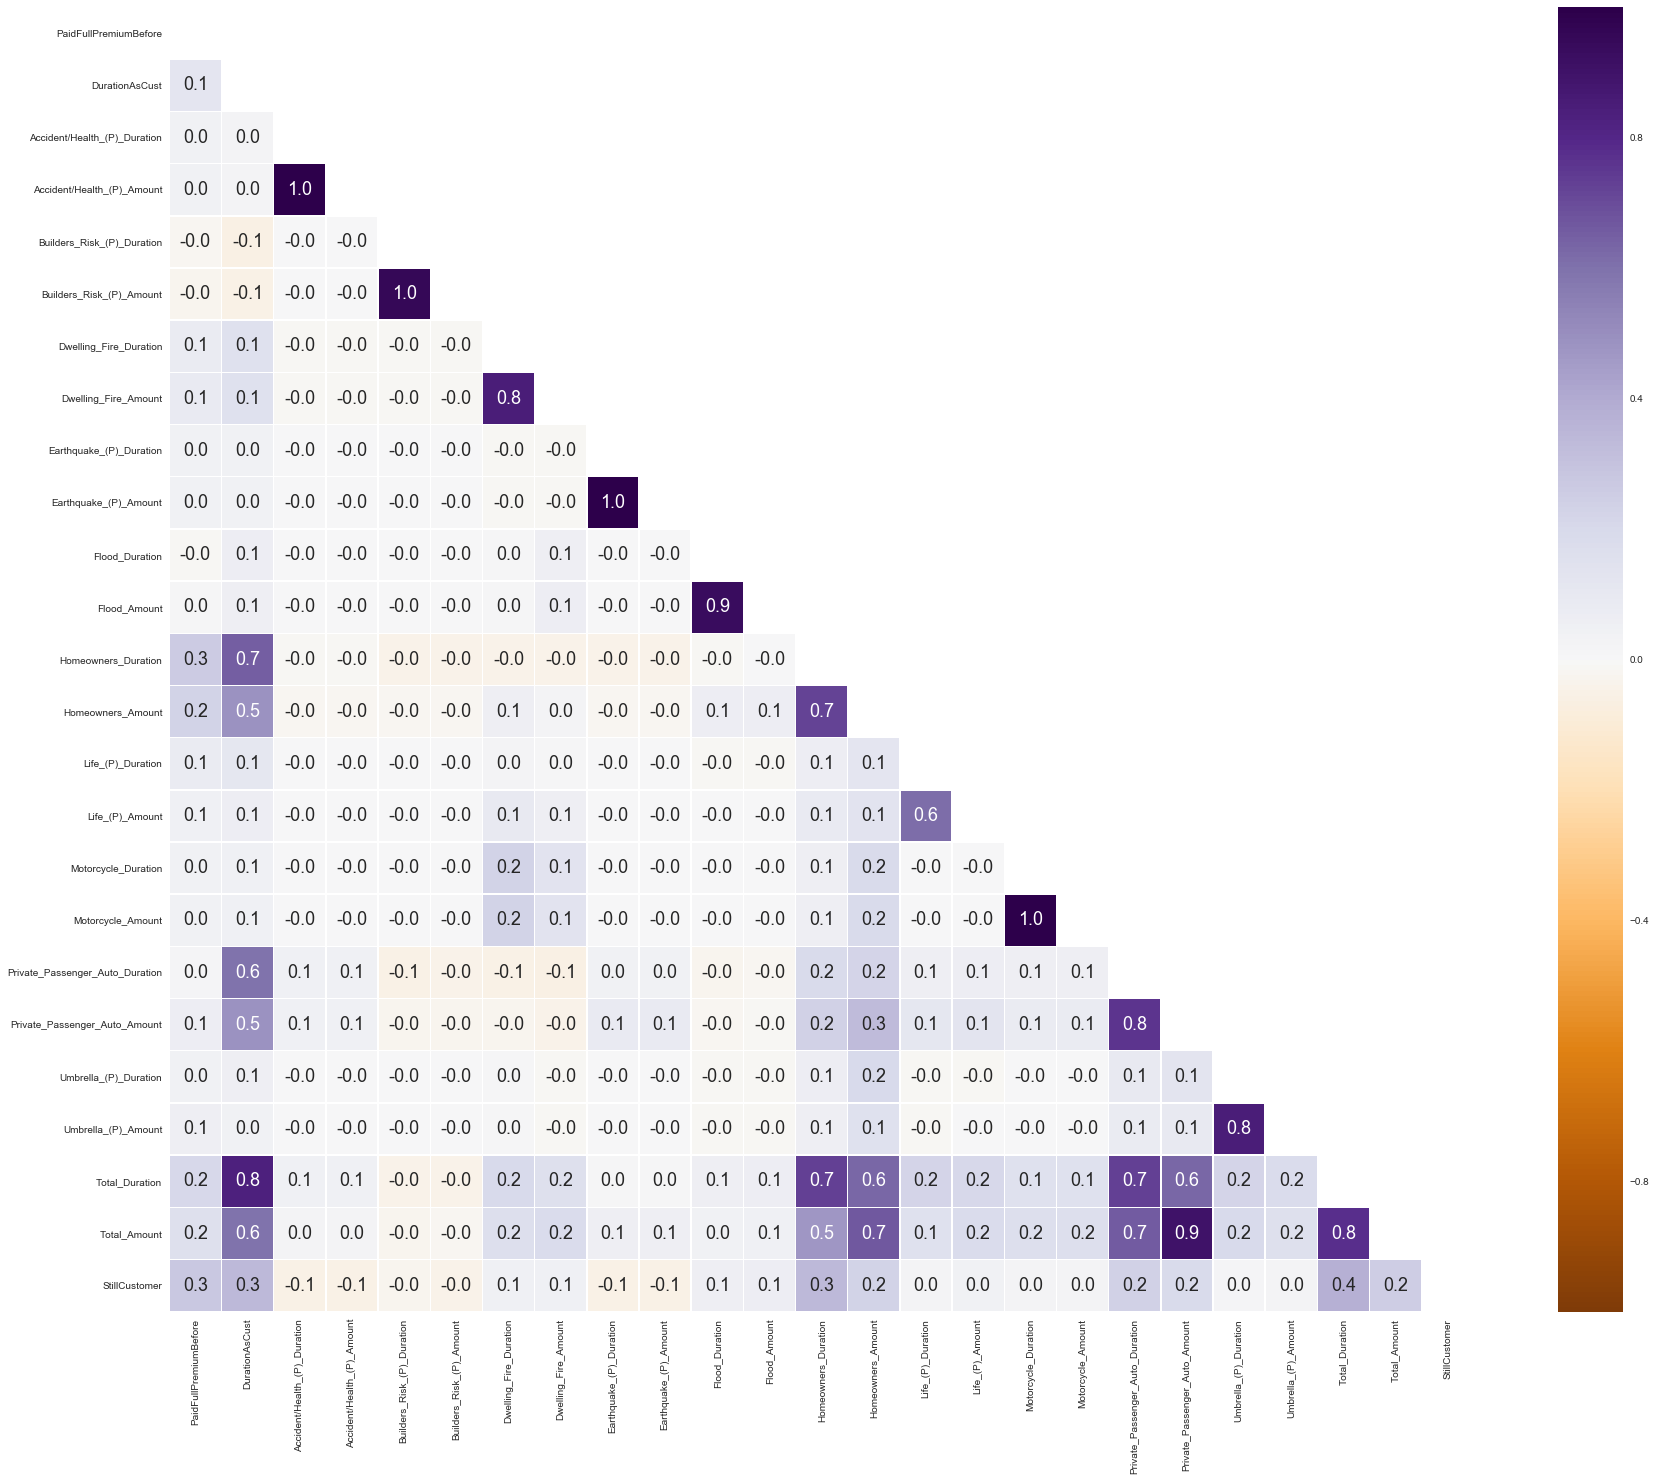

In [9]:
df_corr = df.corr().round(4)

df_corr = df_corr.drop(["Customer_ID", "BecameCust"], axis=1)
df_corr = df_corr.drop(["Customer_ID", "BecameCust"], axis=0)

mask = np.zeros_like(df_corr.round(4))
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(30, 24))
    ax = sns.heatmap(df_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, 
                        square=True, cmap='PuOr', linewidths=.5, annot=True, 
                        annot_kws={"size": 18}, fmt='.1f', )
plt.show()

In [10]:
not_customer = df.StillCustomer[df['StillCustomer'] == 0].count()
still_customer = df.StillCustomer[df['StillCustomer'] == 1].count()

print('Not a Customer: ', not_customer,'\n')
print('Still a Customer: ', still_customer,'\n')
print('Total Number of Customers: ', not_customer + still_customer)

Not a Customer:  265 

Still a Customer:  448 

Total Number of Customers:  713


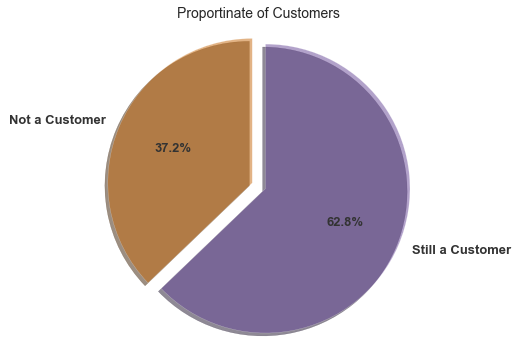

In [11]:
with sns.axes_style("whitegrid"):
    labels = 'Not a Customer', 'Still a Customer'
    sizes = [df.StillCustomer[df['StillCustomer'] == 0].count(), df.StillCustomer[df['StillCustomer'] == 1].count()]
    explode = (0, 0.1)
    fig1, ax1 = plt.subplots(figsize = (9, 6))
    ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, textprops = {'fontsize': 13,                   'weight': 'bold', 'color': '#333333'}, wedgeprops={'alpha':0.5})
    ax1.axis('equal')
    plt.title('Proportinate of Customers', size = 14)
plt.show()

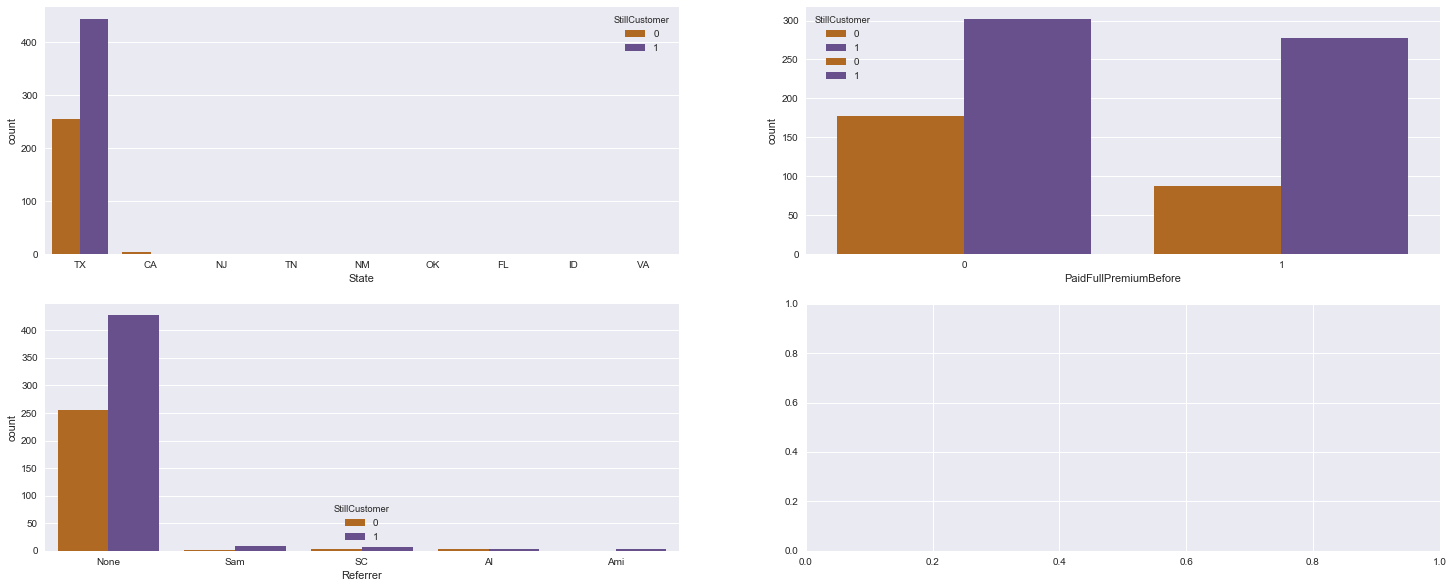

In [12]:
fig, axarr = plt.subplots(2, 2, figsize = (25, 10))
sns.countplot(x='State', hue='StillCustomer', data=df, ax=axarr[0][0])
sns.countplot(x='Gender', hue='StillCustomer', data=df, ax=axarr[0][1])
sns.countplot(x='Referrer', hue='StillCustomer', data=df, ax=axarr[1][0])
sns.countplot(x='PaidFullPremiumBefore', hue='StillCustomer', data=df, ax=axarr[0][1])

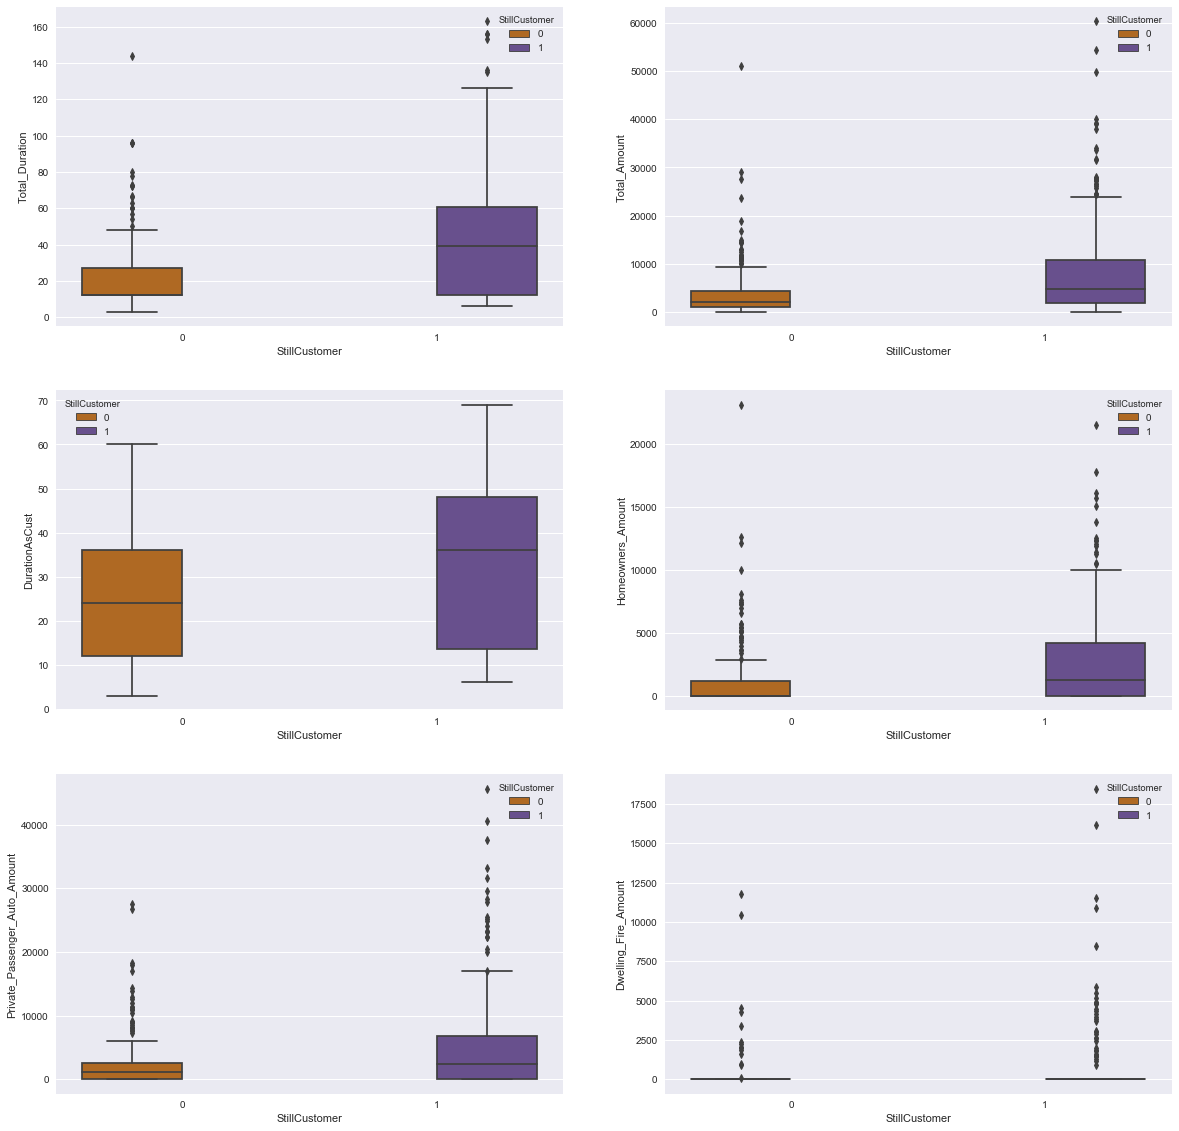

In [13]:
fig, axarr = plt.subplots(3, 2, figsize = (20, 20))
sns.boxplot(y='Total_Duration', x='StillCustomer', hue='StillCustomer', data=df, ax=axarr[0][0])
sns.boxplot(y='Total_Amount', x='StillCustomer', hue='StillCustomer', data=df, ax=axarr[0][1])
sns.boxplot(y='DurationAsCust', x='StillCustomer', hue='StillCustomer', data=df, ax=axarr[1][0])
sns.boxplot(y='Homeowners_Amount', x='StillCustomer', hue='StillCustomer', data=df, ax=axarr[1][1])
sns.boxplot(y='Private_Passenger_Auto_Amount', x='StillCustomer', hue='StillCustomer', data=df, ax=axarr[2][0])
sns.boxplot(y='Dwelling_Fire_Amount', x='StillCustomer', hue='StillCustomer', data=df, ax=axarr[2][1])

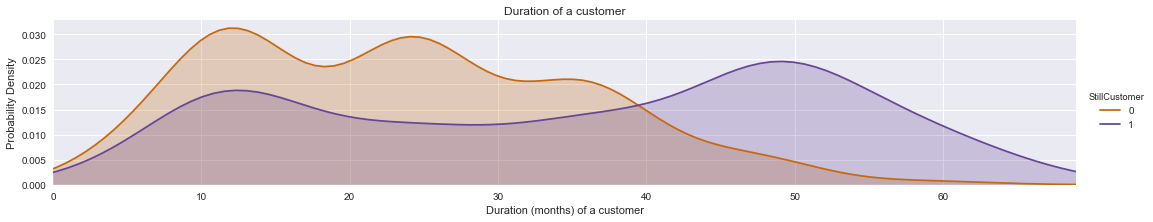

In [14]:
facet = sns.FacetGrid(df, hue='StillCustomer', aspect=5)
facet.map(sns.kdeplot, 'DurationAsCust', shade=True)
facet.set(xlim = (0, df['DurationAsCust'].max()))
facet.add_legend()
plt.title('Duration of a customer')
plt.ylabel('Probability Density')
plt.xlabel('Duration (months) of a customer')
plt.show()

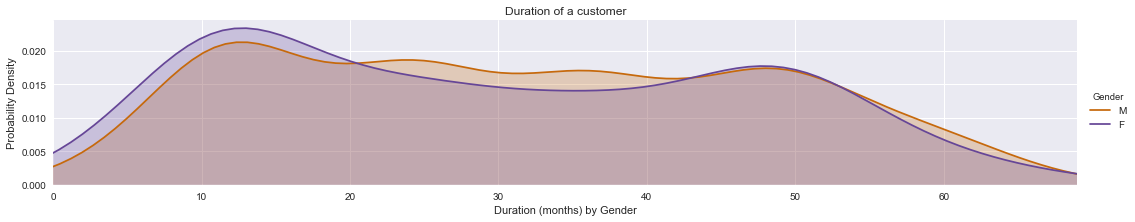

In [15]:
facet = sns.FacetGrid(df, hue='Gender', aspect=5)
facet.map(sns.kdeplot, 'DurationAsCust', shade=True)
facet.set(xlim = (0, df['DurationAsCust'].max()))
facet.add_legend()
plt.title('Duration of a customer')
plt.ylabel('Probability Density')
plt.xlabel('Duration (months) by Gender')
plt.show()

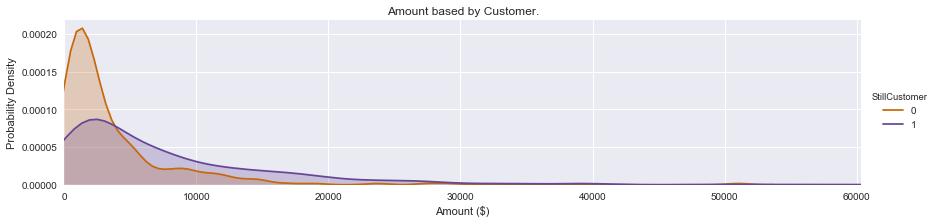

In [16]:
facet = sns.FacetGrid(df, hue = 'StillCustomer', aspect = 4)
facet.map(sns.kdeplot, 'Total_Amount', shade = True)
facet.set(xlim = (0, df['Total_Amount'].max()))
facet.add_legend()
plt.title('Amount based by Customer.')
plt.ylabel('Probability Density')
plt.xlabel('Amount ($)')
plt.show()

In [17]:
df.columns

Index(['Customer_ID', 'Gender', 'Referrer', 'State', 'PaidFullPremiumBefore',
       'BecameCust', 'DurationAsCust', 'Accident/Health_(P)_Duration',
       'Accident/Health_(P)_Amount', 'Builders_Risk_(P)_Duration',
       'Builders_Risk_(P)_Amount', 'Dwelling_Fire_Duration',
       'Dwelling_Fire_Amount', 'Earthquake_(P)_Duration',
       'Earthquake_(P)_Amount', 'Flood_Duration', 'Flood_Amount',
       'Homeowners_Duration', 'Homeowners_Amount', 'Life_(P)_Duration',
       'Life_(P)_Amount', 'Motorcycle_Duration', 'Motorcycle_Amount',
       'Private_Passenger_Auto_Duration', 'Private_Passenger_Auto_Amount',
       'Umbrella_(P)_Duration', 'Umbrella_(P)_Amount', 'Total_Duration',
       'Total_Amount', 'StillCustomer'],
      dtype='object')

In [18]:
# Transform dataset (transform, bin and create dummy variables) and split. Note that we will 
# create a split of 95% (Train) and 5% (Test). The Test set will actually be our unseen holdout
# set for us to do our final validation. 

dl_cust_class = setup(data=df, target='StillCustomer', session_id=786, transformation=True, normalize=False, train_size=0.95, numeric_features=('Accident/Health_(P)_Duration', 'Accident/Health_(P)_Amount', 'Builders_Risk_(P)_Duration', 'Builders_Risk_(P)_Amount', 'Dwelling_Fire_Duration', 'Dwelling_Fire_Amount', 'Earthquake_(P)_Duration', 'Earthquake_(P)_Amount', 'Flood_Duration', 'Flood_Amount', 'Homeowners_Duration', 'Homeowners_Amount', 'Life_(P)_Duration', 'Life_(P)_Amount', 'Motorcycle_Duration', 'Motorcycle_Amount', 'Private_Passenger_Auto_Duration', 'Private_Passenger_Auto_Amount', 'Umbrella_(P)_Duration', 'Umbrella_(P)_Amount'), remove_outliers=False, outliers_threshold=0.05, remove_multicollinearity=False, multicollinearity_threshold=0.9, feature_selection=False, bin_numeric_features=['DurationAsCust'], feature_interaction=False, silent=True, ignore_features=['Customer_ID', 'BecameCust'])


Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(713, 30)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [19]:
# Allocateed various splits to appropriate variables
X_train = dl_cust_class[2]
y_train = dl_cust_class[4]
X_test = dl_cust_class[3]
y_test = dl_cust_class[5]

print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (677, 41)
y_train (677,)
X_test (36, 41)
y_test (36,)


In [20]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.735600,0.802800,0.830500,0.768300,0.797000,0.417500
1,Extreme Gradient Boosting,0.735600,0.802400,0.821200,0.774200,0.795600,0.420400
2,CatBoost Classifier,0.732700,0.796000,0.816600,0.773000,0.792300,0.415600
3,Random Forest Classifier,0.726800,0.749200,0.792900,0.778500,0.784000,0.410300
4,Ridge Classifier,0.726700,0.000000,0.842200,0.752700,0.793700,0.390000
5,Ada Boost Classifier,0.723700,0.782600,0.802300,0.770700,0.784100,0.397900
6,Gradient Boosting Classifier,0.720800,0.805300,0.821100,0.756100,0.786200,0.384100
7,Linear Discriminant Analysis,0.720700,0.797600,0.814000,0.759300,0.782800,0.388500
8,Light Gradient Boosting Machine,0.709100,0.774300,0.795300,0.756000,0.773200,0.365200
9,K Neighbors Classifier,0.708900,0.747200,0.818900,0.747300,0.779400,0.352100
